In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/incendios-cantidad-causas-provincia_2022.csv",encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 7 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                         --------------  ----- 
 0   El siguiente datasel contiene el numero de incendios total por provincia y las causas de dichos incendios por año para el periodo 1993-2022.   678 non-null    object
 1   Unnamed: 1                                                                                                                                     677 non-null    object
 2   Unnamed: 2                                                                                                                                     677 non-null    object
 3   Unnamed: 3                          

In [ ]:
df.head()

,El siguiente datasel contiene el numero de incendios total por provincia y las causas de dichos incendios por año para el periodo 1993-2022.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Este y otros datasets de la temática pueden de...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,anio,provincia,total,negligencia,intencional,natural,desconocida
3,1993,Buenos Aires,0,0,0,0,0
4,1993,Catamarca,0,0,0,0,0


In [ ]:
df = df.drop(df.index[0:2])


In [ ]:
nuevo_encabezado=df.iloc[0]
df.columns=nuevo_encabezado
df.head()

2,anio,provincia,total,negligencia,intencional,natural,desconocida
2,anio,provincia,total,negligencia,intencional,natural,desconocida
3,1993,Buenos Aires,0,0,0,0,0
4,1993,Catamarca,0,0,0,0,0
5,1993,Chaco,0,0,0,0,0
6,1993,Chubut,21,18,0,0,3


In [ ]:
df=df.drop(df.index[0])
df

2,anio,provincia,total,negligencia,intencional,natural,desconocida
3,1993,Buenos Aires,0,0,0,0,0
4,1993,Catamarca,0,0,0,0,0
5,1993,Chaco,0,0,0,0,0
6,1993,Chubut,21,18,0,0,3
7,1993,Córdoba,151,0,0,0,151
...,...,...,...,...,...,...,...
674,2021,Santa Cruz,15,0,0,0,15
675,2021,Santa Fe,102,0,51,0,51
676,2021,Santiago del Estero,6,0,0,0,6
677,2021,Tierra del Fuego,24,23,0,0,1


a. Obtener el número de incendios totales por año para todo el país

In [ ]:
incendios_total=df[["anio","total"]]
incendios_total

2,anio,total
3,1993,0
4,1993,0
5,1993,0
6,1993,21
7,1993,151
...,...,...
674,2021,15
675,2021,102
676,2021,6
677,2021,24


In [ ]:
incendios_total["total"]=incendios_total["total"].astype(int)
incendios_anio = incendios_total.groupby('anio')['total'].sum()

<ipython-input-9-4f208a7f1093>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incendios_total["total"]=incendios_total["total"].astype(int)


In [ ]:
incendios_anio

anio
1993      538
1994      852
1995     4145
1996     4057
1997     4660
1998     8681
1999    10487
2000    10559
2001     7839
2002    10566
2003    12191
2004    12629
2005    17260
2006    11321
2007    10994
2008    17682
2009    10309
2010     7504
2011     6738
2012     5599
2013     6684
2014     6951
2015     6045
2016     7478
2017     7414
2018     9136
2019     6429
2020    10477
2021     6209
Name: total, dtype: int64

b. Realizar un gráfico de barras con el número de incendios totales para cada año del período 1993-2021 para la provincia de Córdoba


In [ ]:
incendios_cordoba=df[["anio","provincia","total"]]


In [ ]:
incendios_totales_cordoba=incendios_cordoba.loc[incendios_cordoba['provincia'] == 'Córdoba']

In [ ]:
incendios_cordoba_histo =  incendios_totales_cordoba.set_index('anio')

In [ ]:
incendios_cordoba_histo=incendios_cordoba_histo.drop("provincia",axis=1)

In [ ]:
incendios_cordoba_histo["total"]=incendios_cordoba_histo["total"].astype(int)

In [ ]:
graficar=incendios_cordoba_histo["total"].to_dict()

In [ ]:
anios=list(graficar.keys())
hectareas_quemadas=list(graficar.values())

<ipython-input-18-7f4f530a5d3d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(anios, rotation=90)


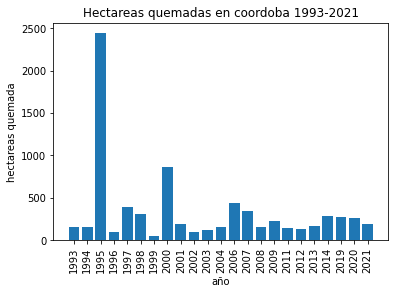

In [ ]:
fig, ax = plt.subplots()

ax.bar(anios, hectareas_quemadas)
ax.set_xticklabels(anios, rotation=90)
ax.set_xlabel('año')
ax.set_ylabel('hectareas quemada')
ax.set_title('Hectareas quemadas en coordoba 1993-2021')

# Mostrar el gráfico
plt.show()

c. Realizar un gráfico de barras que compare el número de incendios intencionales, por negligencia y naturales para el período 2015-2021 en la provincia de Santa Fe.

In [ ]:
incendios_stfe=df[["anio","provincia","negligencia","intencional","natural"]]
incendios_stfe

2,anio,provincia,negligencia,intencional,natural
3,1993,Buenos Aires,0,0,0
4,1993,Catamarca,0,0,0
5,1993,Chaco,0,0,0
6,1993,Chubut,18,0,0
7,1993,Córdoba,0,0,0
...,...,...,...,...,...
674,2021,Santa Cruz,0,0,0
675,2021,Santa Fe,0,51,0
676,2021,Santiago del Estero,0,0,0
677,2021,Tierra del Fuego,23,0,0


In [ ]:
incendios_stfe=incendios_stfe.loc[incendios_stfe['provincia'] == 'Santa Fe']
incendios_stfe=incendios_stfe.loc[incendios_stfe['anio'] > "2014"]
incendios_stfe

2,anio,provincia,negligencia,intencional,natural
536,2015,Santa Fe,307,592,3
560,2016,Santa Fe,252,702,0
584,2017,Santa Fe,247,596,15
608,2018,Santa Fe,308,1131,2
624,2019,Santa Fe,151,804,2
651,2020,Santa Fe,117,641,100
675,2021,Santa Fe,0,51,0


In [ ]:
incendios_stfe["negligencia"]=incendios_stfe["negligencia"].astype(int)
incendios_stfe["intencional"]=incendios_stfe["intencional"].astype(int)
incendios_stfe["natural"]=incendios_stfe["natural"].astype(int)


In [ ]:
incendios_negligencia_stfe=incendios_stfe["negligencia"].sum()
incendios_negligencia_stfe

1382

In [ ]:
incendios_intencional_stfe=incendios_stfe["intencional"].sum()
incendios_intencional_stfe

4517

In [ ]:
incendios_natural_stfe=incendios_stfe["natural"].sum()
incendios_natural_stfe

122

<ipython-input-32-3e02dfcf02a7>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["negligencia","intencional","natural"], rotation=90)


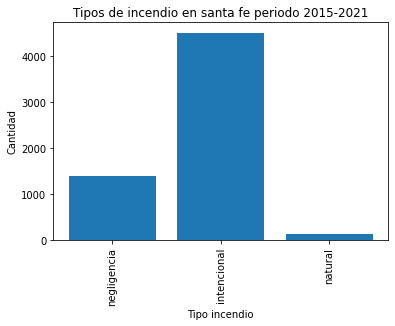

In [ ]:
fig, ax = plt.subplots()

ax.bar(["negligencia","intencional","natural"], [incendios_negligencia_stfe,incendios_intencional_stfe,incendios_natural_stfe])
ax.set_xticklabels(["negligencia","intencional","natural"], rotation=90)
ax.set_xlabel('Tipo incendio')
ax.set_ylabel('Cantidad')
ax.set_title('Tipos de incendio en santa fe periodo 2015-2021')

# Mostrar el gráfico
plt.show()

Obtener el promedio para todo el período del número de incendios intencionales, por negligencia y naturales para la provincia de Río Negro.


In [ ]:
incendios_rio=df[["anio","provincia","negligencia","intencional","natural"]]


In [ ]:
incendios_rio=incendios_rio.loc[incendios_rio['provincia'] == 'Río Negro']


In [ ]:
incendios_rio["natural"]=incendios_rio["natural"].str.replace("-","0")

In [ ]:
incendios_rio["negligencia"]=incendios_rio["negligencia"].astype(int)
incendios_rio["intencional"]=incendios_rio["intencional"].astype(int)
incendios_rio["natural"]=incendios_rio["natural"].astype(int)

In [ ]:
negligencia_prom=incendios_rio["negligencia"].mean()
negligencia_prom

240.9655172413793

In [ ]:
intencional_prom=incendios_rio["intencional"].mean()
intencional_prom

343.7586206896552

In [ ]:
natural_prom=incendios_rio["natural"].mean()
natural_prom

18.896551724137932

El promedio de incendios en Rio Negro en el periodo 1993-2021 es:

*   Incendios por negligencia 240
*   Incendios intencionales 343
*   Incendios naturales 18






<ipython-input-52-d8531fc3d05c>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["negligencia","intencional","natural"], rotation=90)


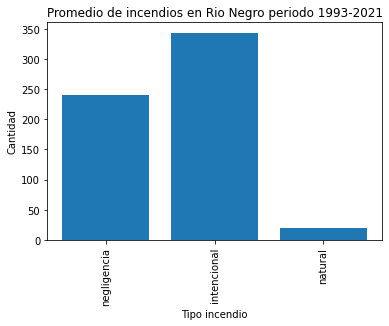

In [ ]:
fig, ax = plt.subplots()

ax.bar(["negligencia","intencional","natural"], [negligencia_prom,intencional_prom,natural_prom])
ax.set_xticklabels(["negligencia","intencional","natural"], rotation=90)
ax.set_xlabel('Tipo incendio')
ax.set_ylabel('Cantidad')
ax.set_title('Promedio de incendios en Rio Negro periodo 1993-2021')

# Mostrar el gráfico
plt.show()